<center><img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExb3VmYWpiNmExbWlkbmUwa3NmeGgxN3dhZW8zaGx4bjQ5Y3ltYWg1bSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/XOY5y7YXjTD7q/giphy.gif" width=600 height=600></center>

In [ ]:
# In this we will try predict if a certain passanger will survive in titanic incident 
# based on some criteria ex-> age ,gender , Class etc
# definetly these things have effect as higher class should have high chance
# children and women more preffered to save first,than old age and males

In [ ]:
# Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# using pandas to read csv file to work with and getting overview of data as well

In [2]:
data=pd.read_csv("titanic_data.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# checking if data cleaning required 

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

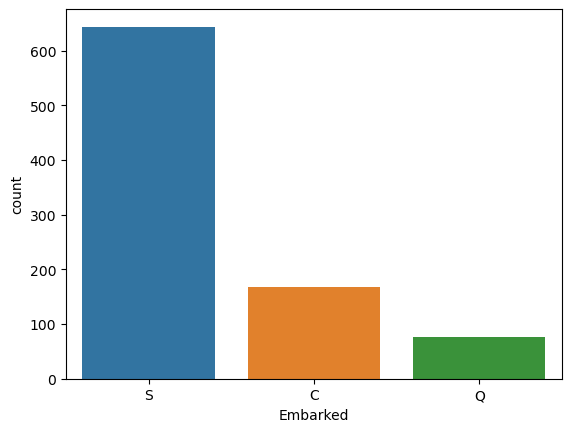

In [5]:
sns.countplot(data=data,x="Embarked")

In [6]:
data["Embarked"].fillna("S",inplace=True)

In [7]:
# name , passenger id and ticket has no role, cabin has 75% nan so no role as well
data.drop(["Name","PassengerId","Ticket","Cabin"],axis=1,inplace=True)

In [8]:
# since Fare is depend on Passangers class drop Fare
data.drop(["Fare"],axis=1,inplace=True)

In [9]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [10]:
Male=pd.get_dummies(data["Sex"],drop_first=True,dtype=int)
data["Male"]=Male

In [11]:
data.drop("Sex",axis=1,inplace=True)

In [12]:
# now need add age for nan values

C:\Users\Asus\AppData\Local\Temp\ipykernel_8788\2725421396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Survived"]==1]["Age"])


<Axes: xlabel='Age', ylabel='Density'>

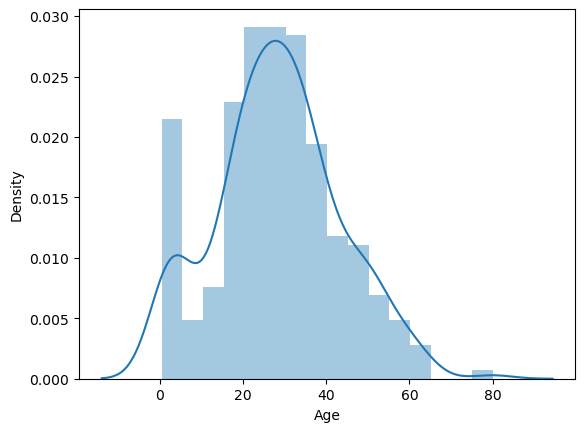

In [13]:
sns.distplot(data[data["Survived"]==1]["Age"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_8788\405461246.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Survived"]==0]["Age"])


<Axes: xlabel='Age', ylabel='Density'>

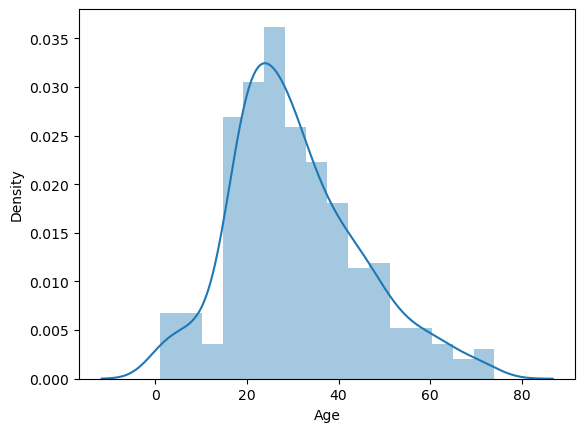

In [14]:
sns.distplot(data[data["Survived"]==0]["Age"])

In [15]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
missing=np.random.randint(15,45,177)

In [17]:
missing

array([16, 23, 28, 16, 22, 23, 33, 30, 17, 18, 38, 29, 35, 36, 34, 33, 19,
       32, 24, 18, 18, 41, 28, 28, 18, 34, 22, 35, 35, 17, 31, 21, 30, 40,
       15, 31, 44, 28, 37, 27, 18, 31, 42, 17, 38, 34, 33, 32, 28, 33, 38,
       39, 26, 22, 36, 22, 38, 21, 44, 32, 42, 30, 30, 44, 40, 30, 36, 31,
       35, 34, 23, 23, 43, 25, 27, 39, 27, 29, 37, 42, 28, 41, 29, 29, 20,
       39, 15, 23, 42, 21, 22, 25, 33, 25, 23, 27, 29, 27, 42, 15, 43, 36,
       27, 20, 24, 43, 36, 39, 27, 22, 38, 40, 25, 30, 19, 42, 39, 20, 31,
       20, 15, 38, 41, 35, 27, 20, 40, 23, 21, 29, 22, 34, 25, 26, 20, 44,
       39, 43, 29, 22, 15, 16, 34, 18, 33, 37, 33, 31, 38, 44, 40, 23, 44,
       31, 44, 34, 19, 19, 41, 22, 33, 17, 38, 26, 20, 34, 36, 20, 34, 39,
       25, 26, 33, 16, 28, 24, 39])

In [18]:
Age=np.array(data["Age"])
Age

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [19]:
j=0
for i in range(len(Age)):
    if(np.isnan(Age[i])==True):
        Age[i]=missing[j]
        j+=1

In [20]:
Age

array([22.  , 38.  , 26.  , 35.  , 35.  , 16.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 23.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 16.  ,
       19.  , 22.  , 23.  , 40.  , 33.  , 30.  , 66.  , 28.  , 42.  ,
       17.  , 21.  , 18.  , 14.  , 40.  , 27.  , 18.  ,  3.  , 19.  ,
       38.  , 29.  , 35.  , 36.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 34.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 33.  , 19.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 32.  , 24.  ,  0.83, 30.  , 22.  ,
       29.  , 18.  , 28.  , 17.  , 33.  , 16.  , 18.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 41.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 18.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 34.  , 32.5 , 32.5 , 54.  , 12.  ,
       22.  , 24.  ,

In [21]:
data.drop("Age",axis=1,inplace=True)
data["Age"]=Age
data

,Survived,Pclass,SibSp,Parch,Embarked,Male,Age
0,0,3,1,0,S,1,22.0
1,1,1,1,0,C,0,38.0
2,1,3,0,0,S,0,26.0
3,1,1,1,0,S,0,35.0
4,0,3,0,0,S,1,35.0
...,...,...,...,...,...,...,...
886,0,2,0,0,S,1,27.0
887,1,1,0,0,S,0,19.0
888,0,3,1,2,S,0,39.0
889,1,1,0,0,C,1,26.0


In [22]:
data.isnull().sum()

Survived    0
Pclass      0
SibSp       0
Parch       0
Embarked    0
Male        0
Age         0
dtype: int64

In [ ]:
# data ready to work with 

In [23]:
from sklearn.preprocessing import LabelEncoder as LE
data["Embarked"]=LE().fit_transform(data["Embarked"])
data

,Survived,Pclass,SibSp,Parch,Embarked,Male,Age
0,0,3,1,0,2,1,22.0
1,1,1,1,0,0,0,38.0
2,1,3,0,0,2,0,26.0
3,1,1,1,0,2,0,35.0
4,0,3,0,0,2,1,35.0
...,...,...,...,...,...,...,...
886,0,2,0,0,2,1,27.0
887,1,1,0,0,2,0,19.0
888,0,3,1,2,2,0,39.0
889,1,1,0,0,0,1,26.0


<Axes: xlabel='Male', ylabel='Survived'>

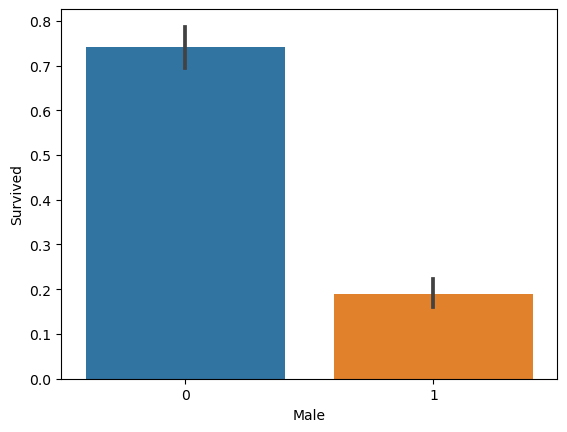

In [24]:
sns.barplot(data=data,x="Male",y="Survived")

<Axes: xlabel='Embarked', ylabel='Survived'>

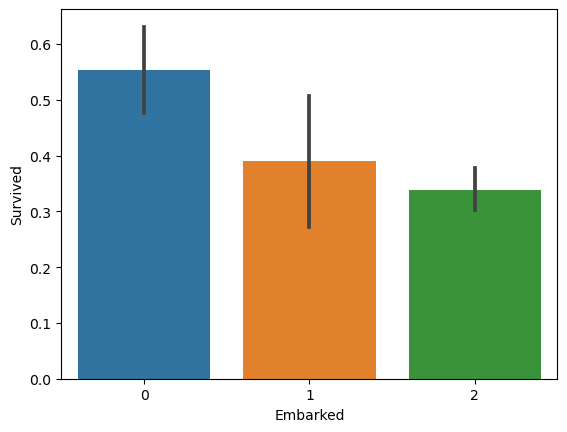

In [25]:
sns.barplot(data=data,x="Embarked",y="Survived")

<Axes: xlabel='Parch', ylabel='Survived'>

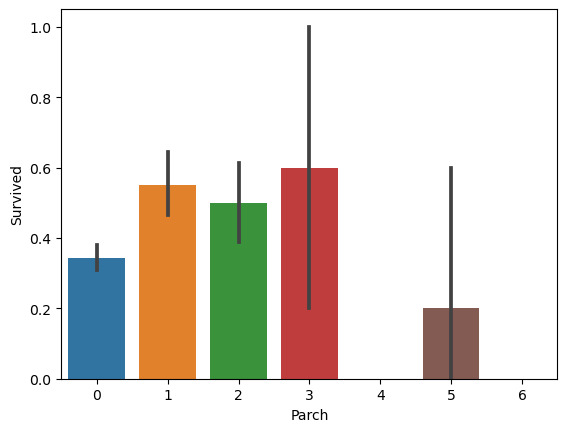

In [26]:
sns.barplot(data=data,x="Parch",y="Survived")

<Axes: xlabel='SibSp', ylabel='Survived'>

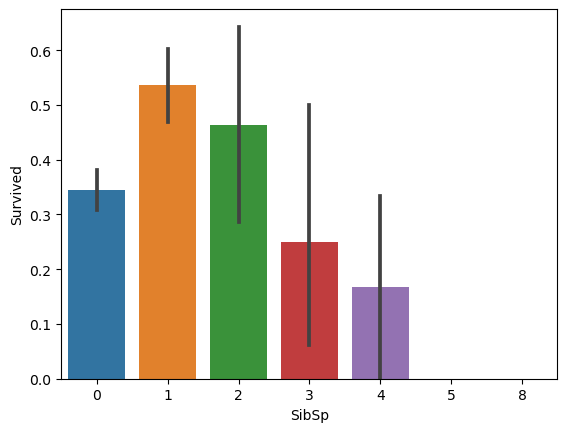

In [27]:
sns.barplot(data=data,x="SibSp",y="Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

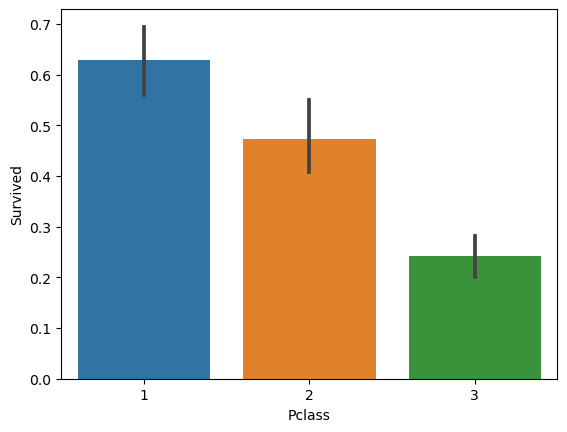

In [28]:
sns.barplot(data=data,x="Pclass",y="Survived")

In [29]:
x=data.drop("Survived",axis=1)
y=data["Survived"]

In [ ]:
# preparing test and train data

In [30]:
from sklearn.preprocessing import StandardScaler as ss
x=ss().fit_transform(x)

In [31]:
x_train=x[:690,:]
x_test=x[691:,:]
y_train=y[:690]
y_test=y[691:]

In [ ]:
# importing random forest as it seems like a decision tree classification so RF is good

In [32]:
from sklearn.ensemble import RandomForestClassifier as RF
rf=RF(n_estimators=100)

In [33]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# predicting on test data 

In [34]:
y_predict=rf.predict(x_test)

In [35]:
y_predict=y_predict.reshape(-1,1)

In [36]:
y_test_=np.array(y_test).reshape(-1,1)
y_test_

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [37]:
correct=0
wrong=0
for i in range(len(y_predict)):
    a=y_test_[i]
    b=y_predict[i]
    if(a==b):
        correct+=1
    else:
        wrong+=1
print(correct,wrong)

162 38


In [ ]:
# above we checked with actual value to get accuracy

In [38]:
accuracy=169/2
accuracy

84.5

In [ ]:
# 85% accuracy not bad, can try different models nd parameters to get more better

<center><img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExb3VmYWpiNmExbWlkbmUwa3NmeGgxN3dhZW8zaGx4bjQ5Y3ltYWg1bSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/OJw4CDbtu0jde/giphy.gif" width=600 height=600></center>